In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [45]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


In [46]:
df = pd.read_csv('Car_Price_Prediction.csv')
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [4]:
df.info()
#no null values
#all the columns are impactful


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [5]:
df.Model.value_counts() #A,B,C,D,E
df.Make.value_counts()

Make
Ford      225
Audi      212
Honda     198
Toyota    187
BMW       178
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [7]:
df['Engine Size'].unique()  #range 0.6 to 5.0 its already like that


array([3.9, 1.7, 4.1, 2.6, 3.4, 2.7, 1.3, 2. , 4.4, 2.1, 4.5, 4. , 3.1,
       1.1, 4.2, 3. , 2.2, 1.5, 2.9, 1. , 1.2, 3.5, 1.9, 3.8, 4.3, 1.6,
       2.8, 2.4, 1.8, 3.7, 3.6, 3.3, 2.5, 2.3, 1.4, 3.2])

In [8]:
df.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


In [47]:
out = []
for i in df['Mileage']:
    if i > 300000:
        out.append(300000)
    elif i<5000:
        out.append(5000) 
    else:
        out.append(i)  
out       

df['Mileage'] = out

In [10]:
df.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2010.688000,2.798300,97249.569000,25136.615530
std,6.288577,1.024137,59357.015012,5181.401368
min,2000.000000,1.000000,5000.000000,6704.953524
25%,2005.000000,1.900000,44768.750000,21587.878370
50%,2011.000000,2.800000,94411.500000,25189.325247
75%,2016.000000,3.700000,148977.750000,28806.368974
max,2021.000000,4.500000,199867.000000,41780.504635


In [11]:
df.Make.value_counts()

Make
Ford      225
Audi      212
Honda     198
Toyota    187
BMW       178
Name: count, dtype: int64

In [13]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [48]:
df['Make'] = df['Make'] + '_' + df['Model'] 

In [49]:
df.drop('Model', axis= True, inplace= True)


<Axes: xlabel='Year'>

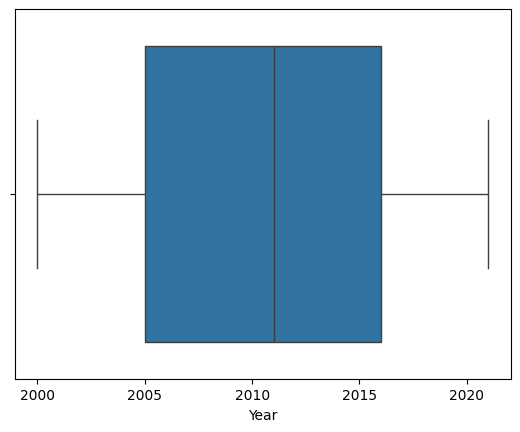

In [16]:
sns.boxplot(x ='Year', data = df)

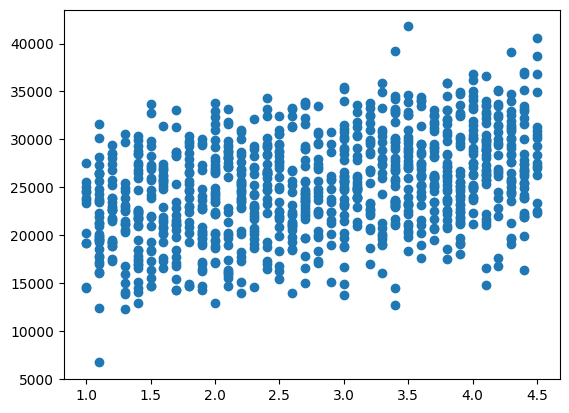

In [17]:
plt.scatter(x= 'Engine Size', y = 'Price', data =df)

<Axes: xlabel='Transmission', ylabel='Price'>

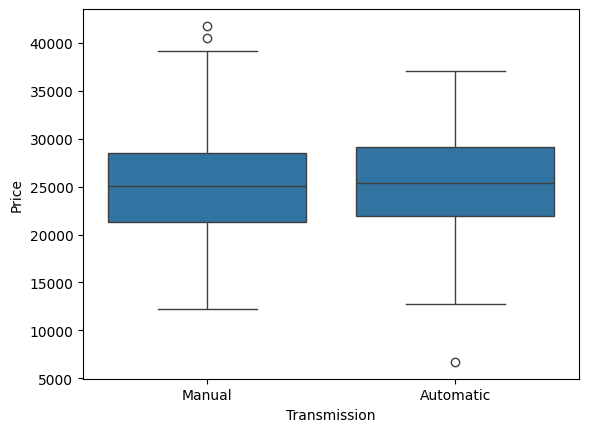

In [18]:
sns.boxplot(x= 'Transmission', y= 'Price', data =df)

<Axes: ylabel='Year'>

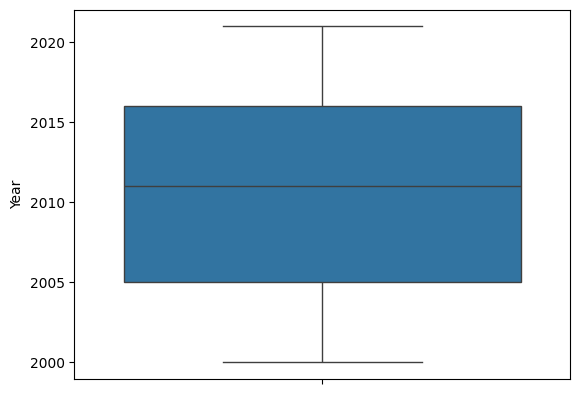

In [19]:
sns.boxplot( y = 'Year', data =df)

In [52]:
copied_dataset = df.copy()
copied_dataset

,Make,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda_Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford_Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW_Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda_Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda_Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...
995,Toyota_Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda_Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford_Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota_Model A,2003,4.4,5000,Petrol,Automatic,27396.156708


In [21]:
df.head()

,Make,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda_Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford_Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW_Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda_Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda_Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [22]:
Le = LabelEncoder()
df['Make'] = Le.fit_transform(df['Make'])
df['Transmission'] = Le.fit_transform(df['Transmission'])
df['Fuel Type'] = Le.fit_transform(df['Fuel Type'])

In [23]:
df.head()

,Make,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,16,2015,3.9,74176,2,1,30246.207931
1,12,2014,1.7,94799,1,0,22785.747684
2,6,2006,4.1,98385,1,1,25760.290347
3,16,2015,2.6,88919,1,0,25638.003491
4,17,2004,3.4,138482,2,0,21021.386657


In [24]:
sobj = StandardScaler()
new_data = sobj.fit_transform(df)
df = pd.DataFrame(new_data,columns=df.columns)

In [25]:
df

,Make,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,0.585779,0.686031,1.076274,-0.388920,1.233139,0.978237,0.986634
1,0.028027,0.526933,-1.072952,-0.041306,0.015825,-1.022247,-0.453940
2,-0.808600,-0.745852,1.271658,0.019138,0.015825,0.978237,0.120428
3,0.585779,0.686031,-0.193723,-0.140417,0.015825,-1.022247,0.096815
4,0.725216,-1.064048,0.587813,0.694999,1.233139,-1.022247,-0.794628
...,...,...,...,...,...,...,...
995,1.561844,-1.382244,-0.877568,-1.547425,1.233139,0.978237,-0.457831
996,0.585779,1.481521,0.294737,0.874174,-1.201489,0.978237,1.014897
997,0.028027,-0.427656,-0.877568,1.654169,1.233139,-1.022247,-1.677938
998,1.143530,-1.223146,1.564734,-1.554925,1.233139,-1.022247,0.436305


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   float64
 1   Year          1000 non-null   float64
 2   Engine Size   1000 non-null   float64
 3   Mileage       1000 non-null   float64
 4   Fuel Type     1000 non-null   float64
 5   Transmission  1000 non-null   float64
 6   Price         1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


In [27]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, train_size= 0.8,random_state=42)

In [29]:
rfmodel = RandomForestRegressor(random_state=42)
params={
    "n_estimators":[100,200,300,400,500],
    "max_depth":[3,4,5,6,7,8,9]
}

In [30]:
grid = GridSearchCV(estimator= rfmodel, param_grid= params, cv =5)


In [31]:
grid.fit(Xtrain,ytrain)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


In [32]:
print('Training efficiency:', grid.score(Xtrain,ytrain))
print('Testing efficiency:', grid.score(Xtest,ytest))   #Overfitting

Training efficiency: 0.9480797715549738
Testing efficiency: 0.8053993834577371


In [33]:
GBmodel = GradientBoostingRegressor(n_estimators=300,max_depth=5,random_state=42)
GBmodel.fit(Xtrain,ytrain)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [34]:
print('Training efficiency:', GBmodel.score(Xtrain,ytrain))
print('Testing efficiency:', GBmodel.score(Xtest,ytest))  #overfitting

Training efficiency: 0.9955728939587061
Testing efficiency: 0.7621332842459383


In [35]:
df.head()

,Make,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,0.585779,0.686031,1.076274,-0.388920,1.233139,0.978237,0.986634
1,0.028027,0.526933,-1.072952,-0.041306,0.015825,-1.022247,-0.453940
2,-0.808600,-0.745852,1.271658,0.019138,0.015825,0.978237,0.120428
3,0.585779,0.686031,-0.193723,-0.140417,0.015825,-1.022247,0.096815
4,0.725216,-1.064048,0.587813,0.694999,1.233139,-1.022247,-0.794628


In [36]:
from xgboost import XGBRegressor
xgmodel = XGBRegressor(n_estimators =300,max_depth=3, learning_rate = 0.01,random_state = 42)

In [37]:
xgmodel.fit(Xtrain,ytrain)                    


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [38]:
print('Training eff:', xgmodel.score(Xtrain,ytrain))
print('Testing eff:', xgmodel.score(Xtest,ytest))   #Generalized as there is only 5%gap

Training eff: 0.8466337359308518
Testing eff: 0.797637112396257


In [53]:
copied_dataset

,Make,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda_Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford_Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW_Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda_Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda_Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...
995,Toyota_Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda_Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford_Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota_Model A,2003,4.4,5000,Petrol,Automatic,27396.156708


In [54]:
copied_dataset.to_csv('copiedStr.csv')

In [55]:
with open('XGBoost.pkl','wb') as file:
    pickle.dump(xgmodel,file)